In [1]:
import os
import json
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
# Collect organizations and their co-occurences

orgs = []
texts = []
years = []
occurences = []

dir = 'data/biomass/'
files = os.listdir(dir)

for index, filename in enumerate(files):

    clear_output(wait=True)
    print(index, '/', len(files), end=' ')
    
    f = open(dir + filename)
    r = f.read()
    parsed = json.loads(r)
    
    # Set tags and remove excessive values

    try:
        # Set tags
        tags = parsed[0]['story_tags']
        
        # Set max
        if len(tags) > 1000: continue
        
        # Set year
        year = int(parsed[0]['publish_date'].split(' ')[0].split('-')[0])
    
    except:
        continue


    # Collect organizations' names
    
    _names = []

    for tag in tags:
        if (tag['tag_set'] == 'cliff_organizations'):
            
            label = tag['tag']
            label = label.replace('.', '')
            
            if label.startswith('U.S. '): label = label.replace('U.S. ', '')
            if label.startswith('US '): label = label.replace('US ', '')
            
            if label == 'EU': label = 'European Union'
            # if label == 'E.U.': label = 'European Union'
            if label == 'IEA': label = 'International Energy Agency'
            if label == 'Exxon': label = 'ExxonMobil'
            if label == 'Exxon Mobil': label = 'ExxonMobil'
            if label == 'ExonnMobil': label = 'ExxonMobil'
            if label == 'US Energy Information Administration': label = 'Energy Information Administration'
            if label == 'Massachusetts Institute of Technology': label = 'MIT'
            # if label == 'U.N.': label = 'United Nations'
            if label == 'UN': label = 'United Nations'
            if label == 'EDF': label = 'Environmental Defense Fund'
            if label == 'International Monetary Found': label = 'International Monetary Fund'
            if label == 'Interior': label = 'Interior Department'
            if label == 'EIA': label = 'Energy Information Administration'
            if label == 'AP': label = 'Associated Press'
            if label == 'NOAA': label = 'National Oceanic and Atmospheric Administration'
            if label == 'US Forest Service': label = 'Forest Service'
            if label == 'US Department of Energy': label = 'Energy Department'
            if label == 'Energy Department': label = 'Department of Energy'
            if label == 'DOE': label = 'Department of Energy'
            if label == 'Energy': label = 'Department of Energy'
            if label == 'Agriculture': label = 'Department of Agriculture'
            if label == 'GE': label = 'General Electric'
            if label == 'Stanford': label = 'Stanford University'
            if label == 'NRDC': label = 'Natural Resources Defense Council'
            if label == 'EPA': label = 'Environmental Protection Agency'
            if label == 'Harvard': label = 'Harvard University'
            if label == 'house': label = 'House'
            if label == 'FDA': label = 'Food and Drug Administration'
            if label == 'GOP': label = 'Republican Party'
            if label == 'PG&E': label = 'Pacific Gas & Electric Co'
            if label == 'Xcel': label = 'Xcel Energy'
            if label == 'Penn State': label = 'Pennsylvania State University'
            if label == 'El Nino': label = 'El Niño'
            if label == 'SEC': label = 'Securities and Exchange Commission'
            if label == 'Sierra': label = 'Sierra Club'
            if label == 'PUC': label = 'Public Utilities Commission'
            if label == 'IMF': label = 'International Monetary Found'
            if label == 'Reuters': label = 'Thomson Reuters'
            if label == 'IFC': label = 'International Finance Corporation'
            if label == 'Oxford University': label = 'University of Oxford'
            if label == 'Royal Dutch Shell': label = 'Shell'
            if label == 'IFC': label = 'Internarnational Finance Corporation'
            if label == 'NREL': label = 'National Renewable Energy Laboratory'
            if label == 'Yale': label = 'Yale University'

            stoplist = {'Elon Musk', 'Trump', 'CCS', 'green energy', 'clean energy', 'PPA', 'PPAs', 'PPP', 'PPPs', 'state'}
            
            if label not in stoplist:
                _names.append(label)

    # Collect by name

    # x -> years
    # y -> occurencies

    _years = {
        2011: 0,
        2012: 0,
        2013: 0,
        2014: 0,
        2015: 0,
        2016: 0,
        2017: 0,
        2018: 0,
        2019: 0,
        2020: 0
    }

    for n in _names:
        
        if n not in orgs:

            orgs.append(n)
            texts.append(_names)
            occurences.append(1)
            years.append(_years)
            years[index][year] += 1
                
        else:

            index = orgs.index(n)
            texts[index] = texts[index] + _names
            occurences[index] += 1
            years[index][year] += 1


# Clean less citates organizations

for index, occurrence in reversed(list(enumerate(occurences))):

    min = 50

    if occurrence < min:
        orgs.pop(index)
        texts.pop(index)
        years.pop(index)
        occurences.pop(index)
    # else:
        # print()
        # print(index, occurrence, orgs[index])
        # print()

# order years by key in an array of tuples

for index, y in enumerate(years):
    sortedDict = dict( sorted(y.items(), key=lambda x: x[0]) )
    _temp = {}
    for k,v in sortedDict.items():
        _temp[k] = v
    years[index] = _temp

print(len(orgs), len(texts), len(years), len(occurences))

# print(occurences[0])
# print(years[0][:, 0])



26449 / 26450 232 232 232 232


In [3]:
# Total linear regression

import numpy as np
from sklearn.linear_model import LinearRegression

total_years = {}

for year in years:
    # print(year)
    for k,v in year.items():
        # print(k, v)
        if k in total_years:
            total_years[k] += v
        else:
            total_years[k] = v

y = list(year.values())
x = list(year.keys())
x = np.array(x).reshape((-1, 1))

model = LinearRegression().fit(x, y)
slope = model.coef_
total_slope = slope[0]
# score = model.score(x, y)

total_years, total_slope


({2011: 4177,
  2012: 3944,
  2013: 8111,
  2014: 8990,
  2015: 11108,
  2016: 14099,
  2017: 9178,
  2018: 17735,
  2019: 25347,
  2020: 29656},
 0.9393939393939391)

In [4]:
# Linear regression

import matplotlib.colors

slopes = []
colors = []

_min = 0
_max = 0


# Slope

for year in years:

    y = list(year.values())
    x = list(year.keys())
    x = np.array(x).reshape((-1, 1))
    
    model = LinearRegression().fit(x, y)
    slope = model.coef_
    # slope = slope[0] - total_slope
    slope = slope[0]
    score = model.score(x, y)
    slopes.append(slope)

    if slope > _max: _max = slope
    if slope < _min: _min = slope

    # print()
    # print(list(year.keys()), y)
    # print('slope', slope, 'score', score)

print('min', _min, 'max', _max)

# Colors

cmap = plt.cm.RdYlBu_r
cmap = plt.cm.coolwarm
# norm = matplotlib.colors.Normalize(vmin=_min, vmax=_max)
norm = matplotlib.colors.DivergingNorm(vmin=_min, vcenter=0, vmax=_max)
# norm = matplotlib.colors.DivergingNorm(vmin=-10, vcenter=0, vmax=10)

for slope in slopes:
    color = cmap(norm(slope))
    colors.append(color)


min -1.4121212121212119 max 65.13939393939391


In [5]:
# Term Frequency Matrix

import textacy

doc_term_matrix, dictionary = textacy.representations.build_doc_term_matrix(texts, tf_type="linear", idf_type="smooth")

In [9]:
# UMAP

import umap
from pointgrid import align_points_to_grid

# reducer = umap.UMAP(n_components=2, n_neighbors=2, min_dist=0.01, metric='cosine')
reducer = umap.UMAP(random_state=2, n_components=2, n_neighbors=2, min_dist=0.01, metric='hellinger')

embedding = reducer.fit_transform(doc_term_matrix)
embedding = align_points_to_grid(embedding)
x = embedding[:, 0]; y = embedding[:, 1]

 * creating mesh with size 49 49
 * filling mesh


In [17]:
# Clustering on embedding

import hdbscan

# clusterer = hdbscan.HDBSCAN(min_cluster_size=4, min_samples=3, cluster_selection_epsilon=.5)
clusterer = hdbscan.HDBSCAN(min_cluster_size=3, min_samples=2)
# clusterer = hdbscan.HDBSCAN(cluster_selection_epsilon=0.3, cluster_selection_method='leaf')
# min_samples is to consier all the elements that owtherwide will be classified as noise
# cluster_selection_epsilon extends clusters
clusterer.fit(embedding)
clusters = clusterer.labels_

# Grouping by cluster

values = set(clusters)
if -1 in values: values.remove(-1)

clusters = [[index for index, cluster in enumerate(clusters) if cluster==value] for value in values]

len(clusters)

20

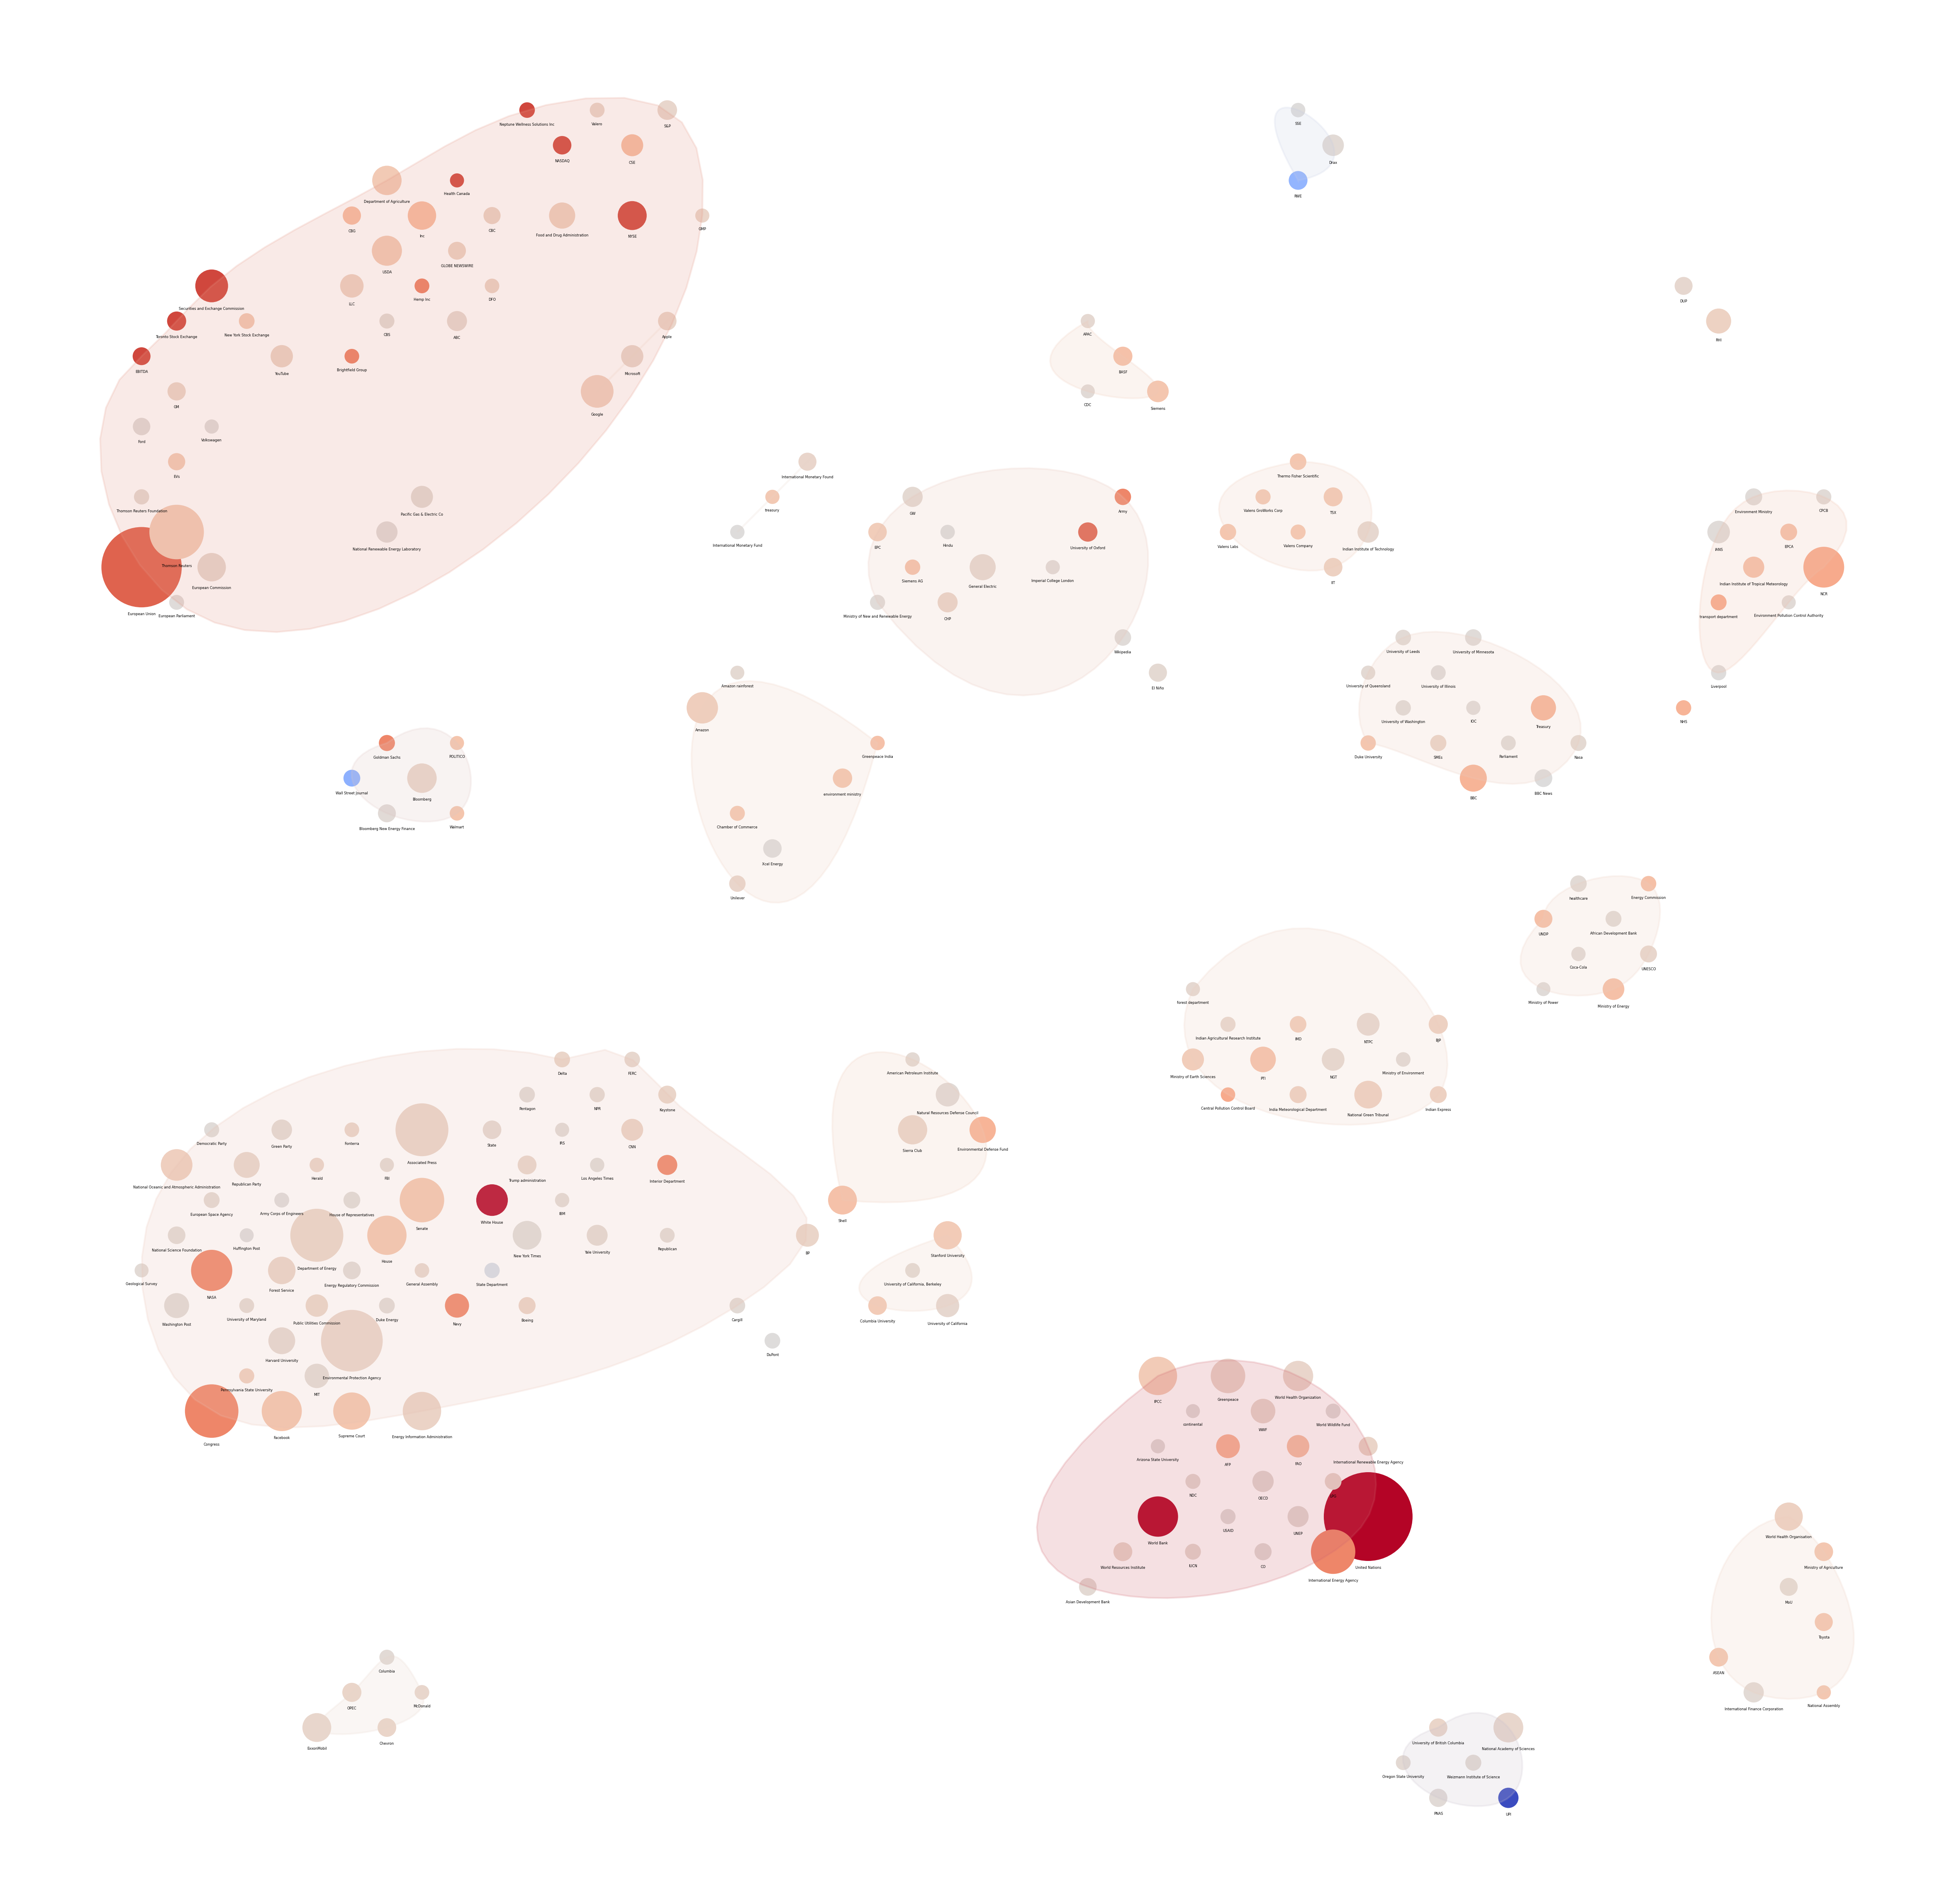

In [18]:
# Plot

import math
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from scipy import interpolate


# Frame

plt.figure(figsize=(20,20), dpi=300)
plt.axis('off')


# Hulls

for cluster in clusters:

    # Average color
    
    background_color = []
    
    for i, index in enumerate(cluster):
        for occurence in range(occurences[index]):
            background_color.append([colors[index][0], colors[index][1], colors[index][2]])

    r = [i[0] for i in background_color]; r = sum(r) / len(r)
    g = [i[1] for i in background_color]; g = sum(g) / len(g)
    b = [i[2] for i in background_color]; b = sum(b) / len(b)

    background_color = (r, g, b, 1)

    # Hull

    points = []
    for index in cluster:
        points.append([embedding[index][0], embedding[index][1]])
    points = np.array(points)

    hull = ConvexHull(points)
    
    x_hull = np.append(points[hull.vertices,0], points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1], points[hull.vertices,1][0])
    
    # interpolate
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    
    # plot shape
    plt.fill(interp_x, interp_y, '--', c=background_color, alpha=.2)


# Scatterplot

plt.scatter(x, y, s=occurences, c=colors)

# Labels

for i, txt in enumerate(orgs):
    text = plt.annotate(orgs[i], xy=(x[i], y[i] - math.sqrt(occurences[i]/math.pi)/40 - .15), ha='center', va='bottom')
    text.set_fontsize(2)

plt.savefig('/Users/dario/Desktop/download.png')
plt.savefig('download.png')
    

